In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap as Basemap
from shapely.geometry import Point, MultiPoint
from ipywidgets import interact, widgets
from IPython.display import display

In [2]:
df = pd.read_csv('timeseries1.csv', parse_dates=['date'], dtype='unicode')
df

,locationID,slug,name,level,city,county,state,country,lat,long,...,deaths,recovered,active,tested,hospitalized,hospitalized_current,discharged,icu,icu_current,date
0,iso1:pt,pt,Portugal,country,NaN,NaN,NaN,Portugal,39.6,-8.52,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-22
1,iso1:pt,pt,Portugal,country,NaN,NaN,NaN,Portugal,39.6,-8.52,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-23
2,iso1:pt,pt,Portugal,country,NaN,NaN,NaN,Portugal,39.6,-8.52,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-24
3,iso1:pt,pt,Portugal,country,NaN,NaN,NaN,Portugal,39.6,-8.52,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-25
4,iso1:pt,pt,Portugal,country,NaN,NaN,NaN,Portugal,39.6,-8.52,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2330,iso1:tt,tt,Trinidad and Tobago,country,NaN,NaN,NaN,Trinidad and Tobago,10.47,-61.26,...,76,2729,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-02
2331,iso1:tt,tt,Trinidad and Tobago,country,NaN,NaN,NaN,Trinidad and Tobago,10.47,-61.26,...,79,2802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-03
2332,iso1:tt,tt,Trinidad and Tobago,country,NaN,NaN,NaN,Trinidad and Tobago,10.47,-61.26,...,81,2843,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-04
2333,iso1:tt,tt,Trinidad and Tobago,country,NaN,NaN,NaN,Trinidad and Tobago,10.47,-61.26,...,82,2884,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-05


In [3]:
case_df = df[['country', 'lat', 'long', 'cases', 'date']]
case_df

,country,lat,long,cases,date
0,Portugal,39.6,-8.52,0,2020-01-22
1,Portugal,39.6,-8.52,0,2020-01-23
2,Portugal,39.6,-8.52,0,2020-01-24
3,Portugal,39.6,-8.52,0,2020-01-25
4,Portugal,39.6,-8.52,0,2020-01-26
...,...,...,...,...,...
2330,Trinidad and Tobago,10.47,-61.26,4629,2020-10-02
2331,Trinidad and Tobago,10.47,-61.26,4715,2020-10-03
2332,Trinidad and Tobago,10.47,-61.26,4763,2020-10-04
2333,Trinidad and Tobago,10.47,-61.26,4767,2020-10-05


In [4]:
m = Basemap(llcrnrlon=-150., llcrnrlat=-50., urcrnrlon=160., urcrnrlat=75., rsphere=(6378137.00,6356752.3142), resolution='l', projection='merc', lat_0=0,lon_0=0., lat_ts=20.)

In [5]:
G=nx.Graph()
plt.figure(figsize = (20,10))

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

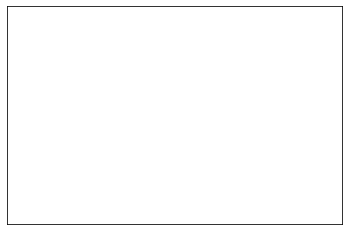

In [6]:
nx.draw_networkx(G, node_size=200, node_color='blue')

In [7]:
# Create a scatter plot of cases on a single date d.

d = pd.Timestamp(year=2020,month=12,day=31)
one_date_df = case_df[case_df['date']== d]
map_points = pd.Series([Point(m(mapped_x, mapped_y)) for mapped_x, mapped_y in zip(one_date_df['long'], one_date_df['lat'])])

<ipython-input-7-815354eafbf2>:5: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  map_points = pd.Series([Point(m(mapped_x, mapped_y)) for mapped_x, mapped_y in zip(one_date_df['long'], one_date_df['lat'])])


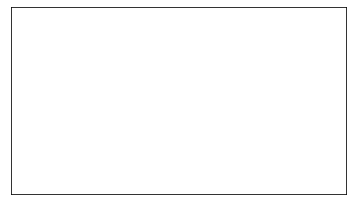

In [8]:
# Create a scatterplot on the map
dev = m.scatter( [geom.x for geom in map_points],  [geom.y for geom in map_points],  20, marker='o', lw=.25, facecolor='#33ccff', edgecolor='w', alpha=0.9,antialiased=True, zorder=3)

Text(0.5, 1.0, 'Coronavirus')

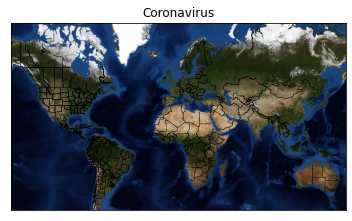

In [9]:
# Now draw the map
m.drawcountries()
m.drawstates()
m.bluemarble()
plt.title('Coronavirus')

In [9]:
def create_map(date_d):
    m = Basemap(
            llcrnrlon=-150.,
            llcrnrlat=-50.,
            urcrnrlon=160.,
            urcrnrlat=75.,\
            rsphere=(6378137.00,6356752.3142),\
            resolution='l',projection='merc',\
            lat_0=0,lon_0=0.,lat_ts=20.)
    G=nx.Graph()
    fig = plt.figure(figsize = (20,10))
    nx.draw_networkx(G,node_size=200,node_color='blue')
    # Draw scatter
    one_date_df = case_df[case_df['date'] == date_d]
    map_points = pd.Series([Point(m(float(mapped_x), float(mapped_y))) for mapped_x, mapped_y in zip(one_date_df['long'], one_date_df['lat'])])
    # Scatterplot on the map
    dev = m.scatter(
            [geom.x for geom in map_points],
            [geom.y for geom in map_points],
            20, marker='o', lw=.25,
            facecolor='#33ccff', edgecolor='w',
            alpha=0.9,antialiased=True,
            zorder=3)
    # Draw the map
    m.drawcountries()
    m.drawstates()
    m.bluemarble()
    plt.title('Global Coronavirus Cases Starting From 1/22/2020')
    return (date_d, fig)

In [41]:
all_dates = list(case_df['date'].unique())

all_maps = [ ]
for date_d in all_dates:
    all_maps.append(create_map(date_d))

KeyboardInterrupt: 

In [ ]:
def f(index):
    img = all_maps[index][1]
    display(img)

In [ ]:
interact(f, index=widgets.IntSlider(min=0,max=68,step=1,value=1,
 description='Date Starting From 1/22/2020:' ))

In [10]:
df['casesD'] = 0
df['dist'] = 0; df['arc_weight'] = 0
# Tem que ser para cada região
df.index = range(df.shape[0])
lastV = None
lat = 39.6; long = -8.52
for index, row in df.iterrows():
    if(lastV != None):
        df.loc[index-1, 'casesD'] = float(row['cases'])-lastV
    lastV = float(row['cases'])
    df.loc[index, 'dist'] = ((float(row['lat'])-lat)**2 + (float(row['long'])-long)**2)**0.5
distMax = max(df['dist'].to_list())
for index, row in df.iterrows():
    df.loc[index, 'arc_weight'] = distMax-row['dist']

distMax
# T1: Add the column 'dist' to Portugal
# T2: Create a variable with all different locations
# T3: Create a networkx with all the nodes per "3 times before"

60.250016597508086

In [13]:
min(df['casesD'].to_list())

-813400